In [34]:
import pandas as pd 
import numpy as np 


from sklearn.manifold import TSNE
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim import corpora, models
# NLTK
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re
# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import seaborn as sns
# Bokeh
from bokeh.plotting import figure, show, output_file
from bokeh.io import export_png
from bokeh.io import output_notebook, export_svgs
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column,row
from bokeh.palettes import Cividis256, viridis
from bokeh.palettes import all_palettes, Viridis256, varying_alpha_palette

# Read in the data, but restrict to only reading in necessary columns 
1. `years`: year the journal article was published
2. `journals`: The journal that the article was published in 
    - `JEAB`: Journal of the experimental analysis of behavior
    - `JABA`: Journal of applied behavior analysis
    - `BAP_`: Behavior analysis in practice
    - `AOVB`: The Analysis of Verbal Behavior
    - `TBA_`: The Behavior Analyst
3. `text`: Full text of the article
4. `lemmatization`: Common text pre-processing techniques applied to this column

In [22]:
df = pd.read_csv("../data/final_df_with_npp_dataframe.csv",usecols=['years','journals','text','lemmatization'])
df.head()

,text,years,journals,lemmatization
0,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal effect concurrentchains procedure used...
1,EDITORIAL\n\nMy delight in embarking on a four...,1988,JEAB,delight embarking fouryear term stem largely v...
2,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal variableinterval schedule pecking key ...
3,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal concurrentschedule performance effect ...
4,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal two experiment investigated acquisitio...


### Remove the control journal from the dataframe

In [23]:
df = df.loc[df['journals']!='Cont',:]
df = df.reset_index(drop=True)
df['journals'].value_counts()

journals
JEAB    4269
JABA    3389
TBA_    1152
BAP_     548
AOVB     405
Name: count, dtype: int64

### Lowercase everything, and tokenize the lemmatization column

In [6]:
df['text_tokens'] = df.lemmatization.map(lambda x: x.lower())
df['text_tokens'] = df.text_tokens.map(lambda x: RegexpTokenizer(r'\w+').tokenize(x))
df


,text,years,journals,lemmatization,text_tokens
0,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal effect concurrentchains procedure used...,"[journal, effect, concurrentchains, procedure,..."
1,EDITORIAL\n\nMy delight in embarking on a four...,1988,JEAB,delight embarking fouryear term stem largely v...,"[delight, embarking, fouryear, term, stem, lar..."
2,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal variableinterval schedule pecking key ...,"[journal, variableinterval, schedule, pecking,..."
3,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal concurrentschedule performance effect ...,"[journal, concurrentschedule, performance, eff..."
4,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal two experiment investigated acquisitio...,"[journal, two, experiment, investigated, acqui..."
...,...,...,...,...,...
9758,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal spring relationship student behavior c...,"[journal, spring, relationship, student, behav..."
9759,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal brief behavioral research based ob ser...,"[journal, brief, behavioral, research, based, ..."
9760,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal theft deal problem stealing overcorrec...,"[journal, theft, deal, problem, stealing, over..."
9761,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal effect selfcontrol procedure composed ...,"[journal, effect, selfcontrol, procedure, comp..."


### Create the corpuse and dictionary values of the text, iterate over 4 through 48 topics by 2 and collect the coherence score for each model

In [11]:
np.random.seed(2010)
texts = df['text_tokens'].values
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
dataframe = []
for i in range(4,50,2):
    print(f"Num Topics {i}")
    ldamodel = models.ldamodel.LdaModel(corpus, 
                                    id2word=dictionary, 
                                    num_topics=i, 
                                    passes=5, 
                                    random_state=2010,
                                    minimum_probability=0)

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence Score: ', coherence_lda)   
    dataframe.append({
        "topics":i,
        "coherence_score":coherence_lda
    })

Num Topics 4
Coherence Score:  0.3934168913927511
Num Topics 6
Coherence Score:  0.39426545946229014
Num Topics 8
Coherence Score:  0.41832225573431475
Num Topics 10
Coherence Score:  0.43633566464563833
Num Topics 12
Coherence Score:  0.45370084063421406
Num Topics 14
Coherence Score:  0.44791099877442214
Num Topics 16
Coherence Score:  0.45951907602988035
Num Topics 18
Coherence Score:  0.45541465375674206
Num Topics 20
Coherence Score:  0.43756418681921055
Num Topics 22
Coherence Score:  0.4254739530120936
Num Topics 24
Coherence Score:  0.4618417652581966
Num Topics 26
Coherence Score:  0.46441838967421994
Num Topics 28
Coherence Score:  0.4625521334824058
Num Topics 30
Coherence Score:  0.46451772839016026
Num Topics 32
Coherence Score:  0.47139364293500746
Num Topics 34
Coherence Score:  0.45935601654043756
Num Topics 36
Coherence Score:  0.4659872354553492
Num Topics 38
Coherence Score:  0.4607922552820439
Num Topics 40
Coherence Score:  0.4525734602143567
Num Topics 42
Coherenc

#### Graph the coherence score across topic models

Text(0, 0.5, 'Coherence Score')

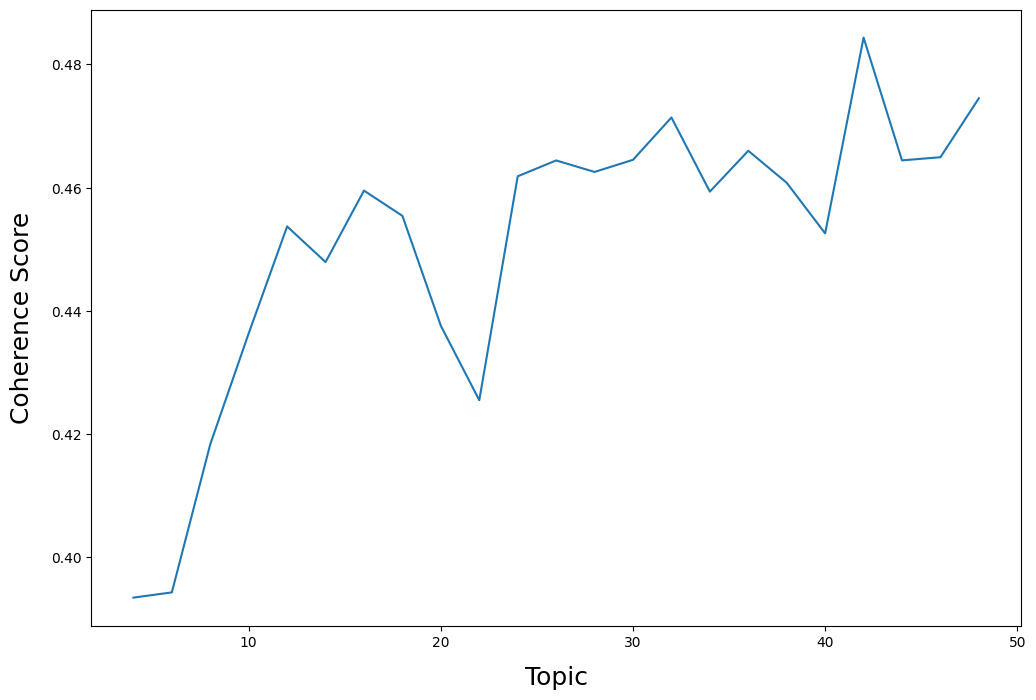

In [12]:
try: 
    coherence_df = pd.DataFrame(dataframe)
except NameError:
    coherence_df = pd.read_csv('../data/coherence_scores.csv')
coherence_df.to_csv('../data/coherence_scores.csv')
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=coherence_df, x='topics',y='coherence_score',ax=ax)
ax.set_xlabel('Topic',labelpad=12,fontsize=18)
ax.set_ylabel('Coherence Score',labelpad=12,fontsize=18)

# Final Model

In [13]:
print(f"Training on {coherence_df.sort_values(by=['coherence_score'],ascending=False)['topics'].iloc[0]} number of topics")

ldamodel = models.ldamodel.LdaModel(corpus, 
                                id2word=dictionary, 
                                num_topics=coherence_df.sort_values(by=['coherence_score'],ascending=False)['topics'].iloc[0], 
                                passes=5, 
                                random_state=2010,
                                minimum_probability=0)

coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)   

Training on 42 number of topics
Coherence Score:  0.47825758405126545


##### By extracting the second element of each tuple, the code block creates a two-dimensional NumPy array, where each row corresponds to a document, and each column represents a topic probability. The resulting array hm provides a numerical representation of the topics and their probabilities for each document in the corpus.

In [14]:
hm = np.array([[y for (x,y) in ldamodel[corpus[i]]] for i in range(len(corpus))])

#### Get the most significant topics (alias for `print_topics()` method).

In [15]:
ldamodel.show_topics(42)


[(0,
  '0.083*"cost" + 0.033*"optimal" + 0.033*"patch" + 0.029*"time" + 0.025*"foraging" + 0.017*"travel" + 0.015*"meal" + 0.012*"per" + 0.011*"resource" + 0.009*"prey"'),
 (1,
  '0.022*"behavior" + 0.017*"response" + 0.016*"stimulus" + 0.012*"reinforcement" + 0.012*"effect" + 0.010*"operant" + 0.008*"may" + 0.007*"reinforcer" + 0.007*"conditioning" + 0.006*"event"'),
 (2,
  '0.059*"stimulus" + 0.029*"observing" + 0.028*"reinforcer" + 0.019*"dog" + 0.019*"condition" + 0.015*"response" + 0.015*"food" + 0.011*"key" + 0.009*"discriminability" + 0.009*"log"'),
 (3,
  '0.024*"session" + 0.021*"condition" + 0.019*"participant" + 0.018*"item" + 0.017*"assessment" + 0.011*"response" + 0.010*"behavior" + 0.009*"reinforcer" + 0.009*"therapist" + 0.009*"result"'),
 (4,
  '0.024*"behavior" + 0.010*"analysis" + 0.006*"one" + 0.006*"may" + 0.005*"research" + 0.005*"verbal" + 0.005*"behavioral" + 0.004*"would" + 0.004*"science" + 0.004*"term"'),
 (5,
  '0.019*"response" + 0.017*"value" + 0.014*"proba

#### Dimensionality reduction

In [25]:
tsne = TSNE(random_state=2010, perplexity=30, early_exaggeration=120)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)



In [28]:
df

,text,years,journals,lemmatization
0,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal effect concurrentchains procedure used...
1,EDITORIAL\n\nMy delight in embarking on a four...,1988,JEAB,delight embarking fouryear term stem largely v...
2,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal variableinterval schedule pecking key ...
3,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal concurrentschedule performance effect ...
4,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,journal two experiment investigated acquisitio...
...,...,...,...,...
9758,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal spring relationship student behavior c...
9759,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal brief behavioral research based ob ser...
9760,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal theft deal problem stealing overcorrec...
9761,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,journal effect selfcontrol procedure composed ...


#### Join some suplimentary info to the dataframe

In [29]:
embedding = pd.concat([embedding,df],axis=1)
embedding = embedding[['x','y','hue','text','years','journals']]

df = embedding.copy()
df

,x,y,hue,text,years,journals
0,-22.996441,4.866583,18,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB
1,55.506302,-3.987736,4,EDITORIAL\n\nMy delight in embarking on a four...,1988,JEAB
2,-22.357363,-8.968458,35,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB
3,-49.818050,-25.707497,27,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB
4,-31.642784,-19.776365,9,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB
...,...,...,...,...,...,...
9758,-5.964077,24.903568,30,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA
9759,4.777900,-3.008772,26,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA
9760,-9.855151,9.342443,26,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA
9761,-8.017184,13.199682,26,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA


#### Create a long list of colors of somewhat complenetary color palettes

In [30]:
losts_of_colors = list(all_palettes['Oranges'][9] + all_palettes['Reds'][9] + all_palettes['YlOrRd'][9] + all_palettes['YlOrBr'][9] + all_palettes['Cividis'][9]+  all_palettes['TolYlOrBr'][9])
len(losts_of_colors)

54

In [31]:
x = ldamodel.show_topics(coherence_df.sort_values(by=['coherence_score'],ascending=False)['topics'].iloc[0], num_words=5,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

topic_words_five = {}
#Below Code Prints Topics and Words
for topic , words in topics_words:
    print(str(topic)+ "::"+ str(words))
    topic_words_five[str(topic)] = str(words)

topic_words_five.keys()


0::['cost', 'optimal', 'patch', 'time', 'foraging']
1::['behavior', 'response', 'stimulus', 'reinforcement', 'effect']
2::['stimulus', 'observing', 'reinforcer', 'dog', 'condition']
3::['session', 'condition', 'participant', 'item', 'assessment']
4::['behavior', 'analysis', 'one', 'may', 'research']
5::['response', 'value', 'probability', 'time', 'function']
6::['effect', 'drug', 'dose', 'responding', 'session']
7::['unit', 'price', 'demand', 'reinforcer', 'consumption']
8::['response', 'stimulus', 'training', 'trial', 'correct']
9::['stimulus', 'training', 'discrimination', 'response', 'test']
10::['class', 'relation', 'stimulus', 'equivalence', 'test']
11::['stimulus', 'signal', 'pairing', 'sound', 'noise']
12::['interval', 'rate', 'response', 'sec', 'schedule']
13::['trial', 'sample', 'session', 'matching', 'stimulus']
14::['subject', 'response', 'contingency', 'point', 'human']
15::['shock', 'response', 'session', 'punishment', 'avoidance']
16::['data', 'analysis', 'group', 'study'

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41'])

In [32]:
df['hue'] = df['hue'].astype(int)
df['hue'] = df['hue'].astype(str)
df['topic_words'] = df['hue'].replace(topic_words_five)
df

,x,y,hue,text,years,journals,topic_words
0,-22.996441,4.866583,18,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,"['choice', 'preference', 'link', 'schedule', '..."
1,55.506302,-3.987736,4,EDITORIAL\n\nMy delight in embarking on a four...,1988,JEAB,"['behavior', 'analysis', 'one', 'may', 'resear..."
2,-22.357363,-8.968458,35,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,"['key', 'bird', 'pigeon', 'peck', 'pecking']"
3,-49.818050,-25.707497,27,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,"['ratio', 'response', 'key', 'schedule', 'rein..."
4,-31.642784,-19.776365,9,JOURNAL OF THE EXPERIMENTAL ANALYSIS OF BEHAVI...,1988,JEAB,"['stimulus', 'training', 'discrimination', 're..."
...,...,...,...,...,...,...,...
9758,-5.964077,24.903568,30,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,"['student', 'child', 'training', 'teacher', 's..."
9759,4.777900,-3.008772,26,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,"['child', 'behavior', 'day', 'condition', 'pro..."
9760,-9.855151,9.342443,26,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,"['child', 'behavior', 'day', 'condition', 'pro..."
9761,-8.017184,13.199682,26,"JOURNAL OF APPLIED BEHAVIOR ANALYSIS\n\n1974, ...",1974,JABA,"['child', 'behavior', 'day', 'condition', 'pro..."


In [35]:
from bokeh.io import curdoc
curdoc().theme = 'dark_minimal'

source = ColumnDataSource(
        data=dict(
            x = embedding.x,
            y = embedding.y,
            colors = [losts_of_colors[i] for i in embedding.hue],
            journal = df.journals,
            topic_words = df.topic_words,
            year = df.years,
            textTopic = df.hue,
            alpha = [.9] * embedding.shape[0],
            size = [9] * embedding.shape[0]
        )
    )
hover_tsne = HoverTool(name='TEST', tooltips="""
    <div style="margin: 10 10 10 10">
        <div style="margin: 0 auto; width:400px;">
            <span style="font-size: 18px; font-weight: bold;">Journal:</span>
            <span style="font-size: 18px"><br>@journal</span>
            <span style="font-size: 18px; font-weight: bold;"><br>Year:</span>
            <span style="font-size: 18px"><br>@year</span>
            <span style="font-size: 18px; font-weight: bold;"><br>Topic_words:</span>
            <span style="font-size: 18px"><br>@topic_words</span>
        </div>
    </div>
    """)
tools = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
plot_tsne = figure(width=1200, height=1000, title='Journal Vizualizations', tools=tools)
plot_tsne.circle('x', 'y', size='size', fill_color='colors', 
                 alpha='alpha', line_alpha=0, line_width=2.0, source=source, name="Journal Vizualizations",line_color='colors',
                 )
plot_tsne.xgrid.grid_line_color = None
plot_tsne.ygrid.grid_line_color = None
callback = CustomJS(args=dict(source=source), code=
    """
    var data = source.data;
    var f = cb_obj.value
    console.log(cb_obj)
    var x = data['x']
    var y = data['y']
    var colors = data['colors']
    var alpha = data['alpha']
    var title = data['journal']
    var year = data['year']
    var size = data['size']
    var topic = data['textTopic']
    for (let i = 0; i < x.length; i++) {
        if (year[i] <= f) {
            alpha[i] = 0.9
            size[i] = 9

        } else {
            alpha[i] = .9
            size[i] = 0
        }
    }
    source.change.emit();
    """)
slider = Slider(start=df.years.min(), end=df.years.max(), value=df.years.max(), step=1, title="Before year",bar_color='red',width=300,height=300)



slider.js_on_change('value', callback)
layout = column( plot_tsne,)
layout2 = row(slider)
show(row(plot_tsne, column(slider
                           )))


export_png(plot_tsne, filename="plot.png")
output_file('journal_viz.html')

